In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [5]:
def load_dataset(filepath):
    return pd.read_csv(filepath)
df = load_dataset('iris.csv')
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
def summarize_dataset(df):
    print(f"""Dataset dimetion:
{df.shape}

First 10 rows of dataset:
{df.head(10)}

Statistical summary:
{df.drop('class', axis=1).corr()}

Class Distribution:
{df['class'].value_counts()}
""")
    
summarize_dataset(df)

Dataset dimetion:
(150, 5)

First 10 rows of dataset:
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

Statistical summary:
              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     

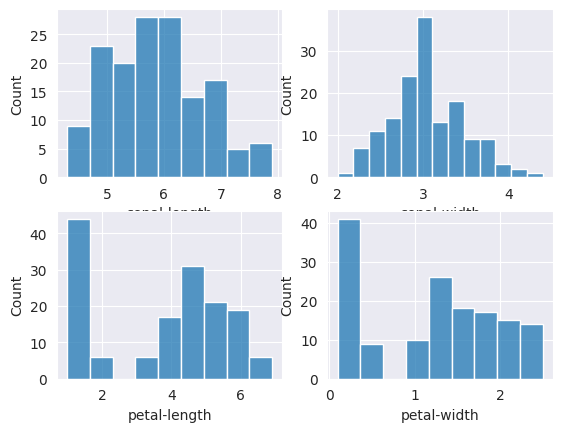

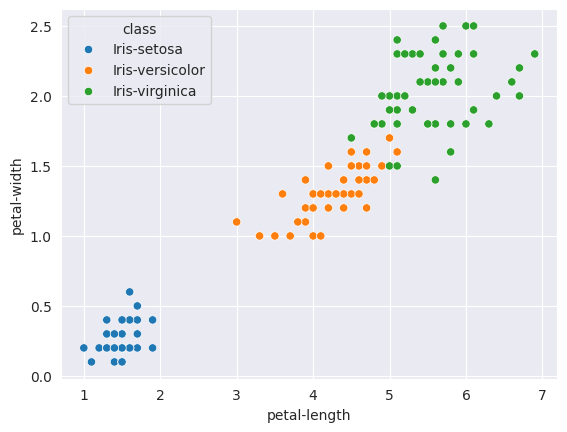

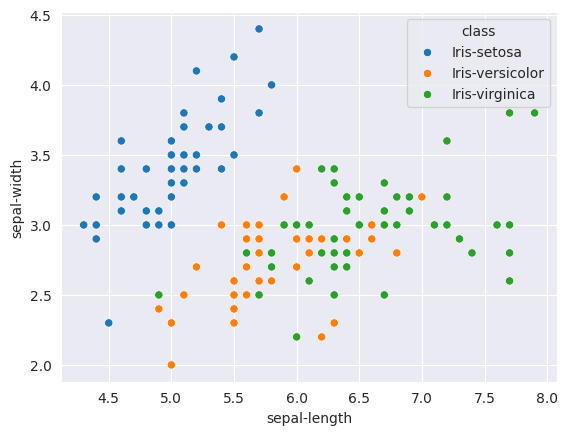

In [7]:
def print_plot_univariate(df):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    sns.histplot(data=df, x='sepal-length', ax=ax[0, 0])
    
    sns.histplot(data=df, x='sepal-width', ax=ax[0, 1])
    
    sns.histplot(data=df, x='petal-length', ax=ax[1, 0])
    
    sns.histplot(data=df, x='petal-width', ax=ax[1, 1])
    plt.show()
    
    sns.scatterplot(data=df, x='petal-length', y='petal-width', hue='class')
    plt.show()
    
    sns.scatterplot(data=df, x='sepal-length', y='sepal-width', hue='class')
    plt.show()
print_plot_univariate(df)

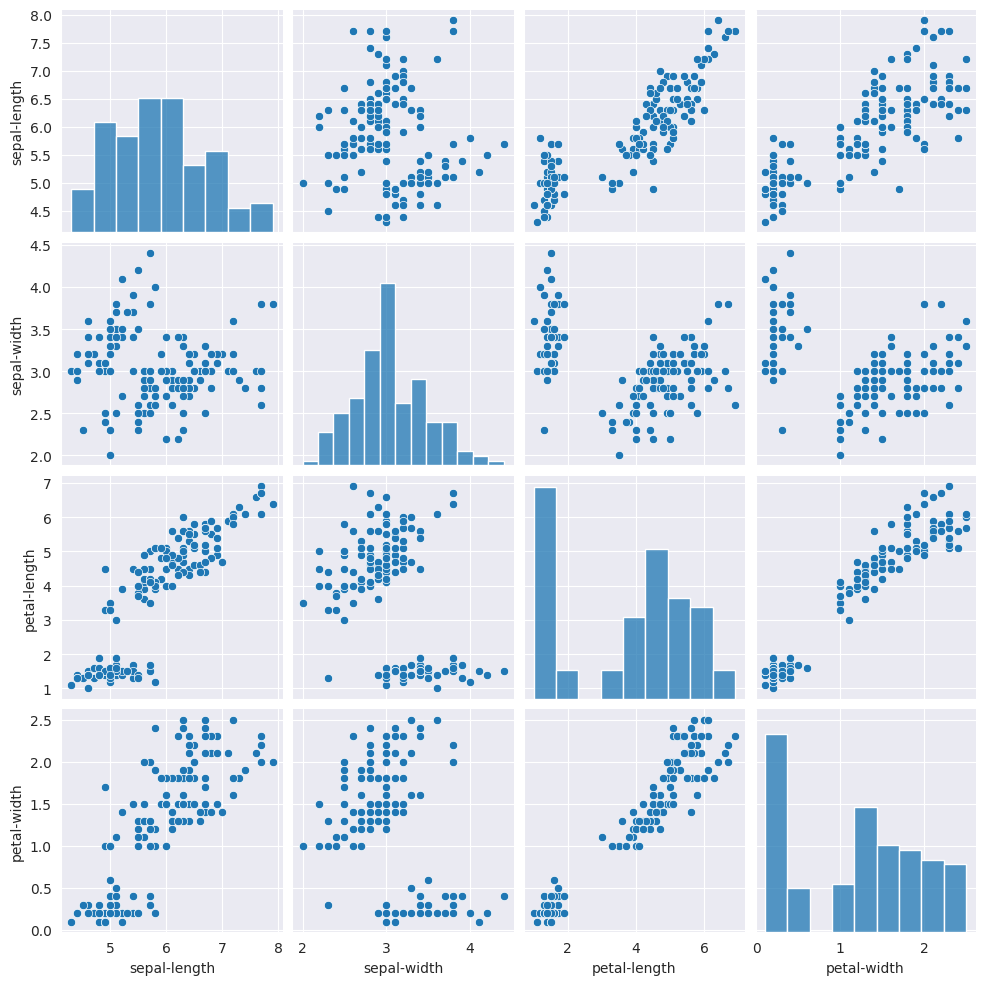

In [8]:
def print_plot_multivariate(df):
        
    sns.pairplot(df)
    plt.show()
print_plot_multivariate(df)

In [9]:
X = df.drop('class', axis=1).values
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=54)

In [10]:
def fit_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

In [11]:
def model_std(model):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    return np.std(scores)

In [14]:
def my_print_and_test_models(df):
    
    tree_model = DecisionTreeClassifier(criterion='entropy')
    tree_acc = fit_model(tree_model)
    tree_std = model_std(tree_model)
    
    knn_model = KNeighborsClassifier(n_neighbors=6)
    knn_acc = fit_model(knn_model)
    knn_std = model_std(knn_model)

    logistic_model = LogisticRegression()
    logistic_acc = fit_model(logistic_model) 
    logistic_std = model_std(logistic_model)
    
    gausian_model = GaussianNB()
    gausian_acc = fit_model(gausian_model)
    gausian_std = model_std(gausian_model)

    svc_model = SVC(gamma='auto')
    svc_acc = fit_model(svc_model)
    svc_std = model_std(svc_model)
    
    dis_model = LinearDiscriminantAnalysis()
    dis_acc = fit_model(dis_model)
    dis_std = model_std(dis_model)
    
    # print(tree_std, dis_std, gausian_std, knn_std, logistic_std, svc_std)
    
    print(f"DecisionTree: {round(tree_acc, 6)} ({round(tree_std, 6)})",
        f"\nGaussianNB: {round(gausian_acc, 6)} ({round(gausian_std, 6)})",
        f"\nKNeighbors: {round(knn_acc, 6)} ({round(knn_std, 6)})",
        f"\nLogisticRegression: {round(logistic_acc, 6)} ({round(logistic_std, 6)})",
        f"\nLinearDiscriminant: {round(dis_acc, 6)} ({round(dis_std, 6)})",
        f"\nSVM: {round(svc_acc, 6)} ({round(svc_std, 6)})")

In [15]:
my_print_and_test_models(df)

DecisionTree: 0.933333 (0.03266) 
GaussianNB: 0.933333 (0.026667) 
KNeighbors: 0.933333 (0.01633) 
LogisticRegression: 0.933333 (0.024944) 
LinearDiscriminant: 0.966667 (0.026667) 
SVM: 1.0 (0.01633)
